In [1]:
import pandas as pd
import numpy as np
from keras.layers import Conv2D,Dense,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=False,validation_split=0.25)

In [3]:
path ='dataset-resized'
train_data = datagen.flow_from_directory(path,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        batch_size=32,
                                        subset='training')
val_data = datagen.flow_from_directory(path,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        batch_size=32,
                                        subset='validation')

                        

Found 1898 images belonging to 6 classes.
Found 629 images belonging to 6 classes.


In [4]:
dir_It = datagen.flow_from_directory(path,
    batch_size=1,
    save_prefix="",
    save_format='png',
)

Found 2527 images belonging to 6 classes.


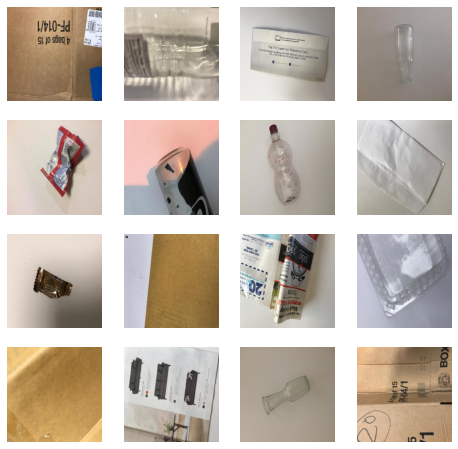

In [5]:
fig = plt.figure(figsize=(8, 8))
#for _ in range(10):
for i in range(1, 4*4 +1):
    img, label = dir_It.next()
    fig.add_subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(img[0])  
plt.show()

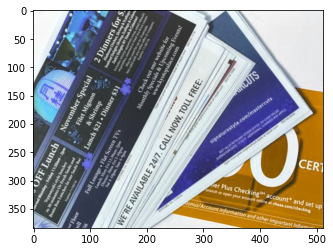

In [6]:
import cv2
from keras.preprocessing import image
imag = cv2.imread("dataset-resized/paper/paper100.jpg")
plt.imshow(imag)

In [7]:

train_data.image_shape

(224, 224, 3)

In [6]:
print(train_data.class_indices)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [8]:
from keras.applications.vgg19 import VGG19
 
basemodel_1 = VGG19(input_shape=(224,224,3),
                include_top=False,
                weights='imagenet')

# To avoid training the weights from imagenet again
for layer in basemodel_1.layers:
    layer.trainable= False

In [9]:
x=Flatten()(basemodel_1.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
output=Dense(6,activation='softmax')(x)

In [10]:
import tensorflow as tf
model1 = tf.keras.Model(basemodel_1.input,output)
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit_generator(train_data,epochs=50,steps_per_epoch=10,validation_data=val_data)

Epoch 1/50


<ipython-input-11-2ae579d45f45>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_data,epochs=50,steps_per_epoch=10,validation_data=val_data)


10/10 [==============================] - 63s 7s/step - loss: 6.5293 - accuracy: 0.3094 - val_loss: 3.1494 - val_accuracy: 0.3498
Epoch 2/50
10/10 [==============================] - 62s 7s/step - loss: 2.3956 - accuracy: 0.3875 - val_loss: 2.1403 - val_accuracy: 0.3847
Epoch 3/50
10/10 [==============================] - 60s 6s/step - loss: 1.4796 - accuracy: 0.5772 - val_loss: 1.3441 - val_accuracy: 0.5103
Epoch 4/50
10/10 [==============================] - 62s 7s/step - loss: 1.1701 - accuracy: 0.5750 - val_loss: 1.3412 - val_accuracy: 0.5151
Epoch 5/50
10/10 [==============================] - 62s 7s/step - loss: 0.8783 - accuracy: 0.6906 - val_loss: 1.0857 - val_accuracy: 0.5453
Epoch 6/50
10/10 [==============================] - 62s 7s/step - loss: 0.8557 - accuracy: 0.7063 - val_loss: 1.0408 - val_accuracy: 0.5962
Epoch 7/50
10/10 [==============================] - 63s 7s/step - loss: 0.8038 - accuracy: 0.7063 - val_loss: 1.1999 - val_accuracy: 0.5819
Epoch 8/50
10/10 [=============

In [12]:
score1 = model1.evaluate(val_data)

20/20 [==============================] - 40s 2s/step - loss: 1.1260 - accuracy: 0.6820


In [13]:
pred = model1.predict(val_data)
pred_list = np.asarray(np.argmax(pred,axis=1))
pred_list

array([3, 1, 3, 3, 1, 0, 1, 1, 4, 1, 2, 3, 5, 4, 1, 2, 4, 2, 1, 1, 4, 2,
       4, 3, 1, 2, 1, 4, 3, 4, 4, 2, 2, 3, 2, 3, 3, 4, 3, 3, 4, 0, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 0, 2, 1, 1, 3, 3, 1, 1, 4, 1, 3, 2,
       0, 3, 0, 1, 1, 3, 3, 3, 5, 0, 2, 1, 1, 3, 4, 4, 3, 2, 3, 5, 4, 4,
       2, 3, 3, 1, 3, 1, 3, 4, 1, 1, 2, 3, 3, 2, 1, 4, 4, 1, 4, 0, 3, 2,
       1, 1, 4, 4, 4, 1, 4, 3, 1, 3, 2, 2, 2, 0, 0, 3, 1, 3, 1, 0, 0, 1,
       1, 3, 2, 3, 1, 3, 1, 3, 3, 1, 5, 0, 4, 1, 2, 1, 0, 4, 3, 0, 3, 3,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 0, 2, 1, 3, 0, 4, 3, 3, 2, 2,
       2, 1, 1, 3, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 3, 0, 3, 1, 2, 2, 3,
       1, 3, 3, 2, 1, 3, 4, 3, 3, 3, 0, 2, 3, 3, 2, 0, 1, 2, 4, 2, 4, 1,
       3, 3, 1, 4, 1, 3, 4, 5, 1, 3, 1, 4, 1, 4, 3, 2, 3, 0, 2, 3, 0, 3,
       2, 3, 3, 2, 3, 1, 0, 0, 1, 3, 3, 2, 1, 3, 1, 1, 2, 1, 4, 0, 0, 1,
       3, 1, 3, 2, 1, 1, 4, 3, 3, 1, 1, 3, 2, 3, 0, 0, 4, 4, 1, 3, 2, 4,
       3, 3, 0, 3, 3, 0, 4, 1, 4, 1, 3, 2, 4, 3, 1,

In [14]:
classes = ['Cardboard','Glass','Metal','Paper','Plastic','Trash']
x=cv2.resize(imag,(224,224))
x=np.expand_dims(x,axis=0)
pred= model1.predict(x)
pred_list = np.argmax(pred)
print("Predicted garbage classification:",classes[pred_list])

Predicted garbage classification: Paper


Text(0, 0.5, 'accuracy')

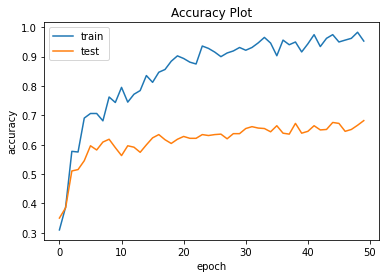

In [15]:
#Accuracy Plot
hist=history.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'Loss')

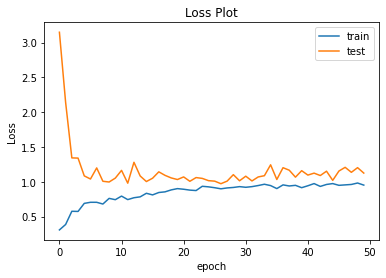

In [16]:
#Loss Plot
hist=history.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_loss"])
plt.title("Loss Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("Loss")

In [17]:
# Googlenet/ Inceptionv3
from keras.applications.inception_v3 import InceptionV3
from keras import Model
from keras.layers import GlobalAveragePooling2D

In [18]:
basemodel_2=InceptionV3(input_shape=(224,224,3),
                include_top=False,
                weights='imagenet')
for layer in basemodel_2.layers:
    layer.trainable= False

In [19]:
m=basemodel_2.output
m=GlobalAveragePooling2D()(m)
m=Flatten()(m)
m=Dense(512,activation='relu')(m)
m_pred=Dense(6,activation='softmax')(m)
model2=Model(basemodel_2.input,m_pred)

In [20]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [21]:
from keras.callbacks import ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=3)

In [22]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit_generator(train_data,epochs=20,steps_per_epoch=10,callbacks=[lrr],validation_data=val_data,validation_steps=5,shuffle=True)

Epoch 1/20


<ipython-input-22-83604eb1f2ac>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(train_data,epochs=20,steps_per_epoch=10,callbacks=[lrr],validation_data=val_data,validation_steps=5,shuffle=True)


10/10 [==============================] - 10s 852ms/step - loss: 2.0240 - accuracy: 0.3906 - val_loss: 1.7397 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 7s 743ms/step - loss: 1.1080 - accuracy: 0.6469 - val_loss: 1.0367 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 7s 749ms/step - loss: 0.7475 - accuracy: 0.7188 - val_loss: 0.7499 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 7s 742ms/step - loss: 0.5916 - accuracy: 0.7875 - val_loss: 0.8740 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 7s 747ms/step - loss: 0.4910 - accuracy: 0.8438 - val_loss: 0.7875 - val_accuracy: 0.7125 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 7s 751ms/step - loss: 0.4580 - accuracy: 0.8438 - val_loss: 0.7758 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 7s 752ms/step - loss: 0.4724

In [23]:
score2 = model2.evaluate(val_data)

20/20 [==============================] - 9s 462ms/step - loss: 0.7184 - accuracy: 0.7552


Text(0, 0.5, 'accuracy')

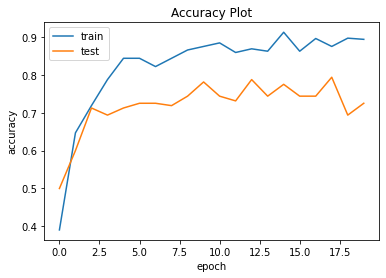

In [24]:
#Accuracy Plot
hist=history2.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'Loss')

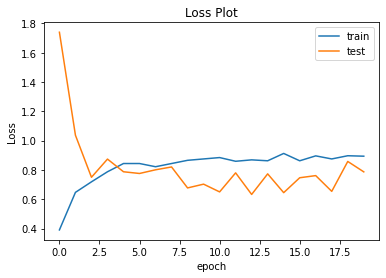

In [25]:
#Loss Plot
hist=history2.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_loss"])
plt.title("Loss Plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("Loss")

In [26]:
model3= Sequential([
    Conv2D(filters=256,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(3,3),strides=(2,2)),
    Dropout(0.3),
   
    Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(3,3),strides=(2,2)),
    
    #Fully connected layer 1
    Dense(128,input_shape=(231,231),activation='relu'),
    #Fully connected layer 2
    Dense(64,activation='relu'),
    Dropout(0.2),
    Flatten(),
   
    Dense(6,activation='softmax')
])

In [27]:
model3.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
history3=model3.fit_generator(train_data,epochs=20,steps_per_epoch=10,callbacks=[lrr],validation_data=val_data,validation_steps=5,shuffle=True)

Epoch 1/20


<ipython-input-27-1016a815de53>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=model3.fit_generator(train_data,epochs=20,steps_per_epoch=10,callbacks=[lrr],validation_data=val_data,validation_steps=5,shuffle=True)


10/10 [==============================] - 57s 6s/step - loss: 1.7543 - accuracy: 0.2062 - val_loss: 1.7600 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 55s 6s/step - loss: 1.7176 - accuracy: 0.2281 - val_loss: 1.6979 - val_accuracy: 0.2313 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 55s 6s/step - loss: 1.6845 - accuracy: 0.2313 - val_loss: 1.7511 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 54s 5s/step - loss: 1.7313 - accuracy: 0.3156 - val_loss: 1.6757 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 55s 6s/step - loss: 1.6486 - accuracy: 0.3000 - val_loss: 1.6178 - val_accuracy: 0.2937 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 51s 5s/step - loss: 1.6773 - accuracy: 0.2349 - val_loss: 1.6894 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 54s 5s/step - loss: 1.6192 - accuracy: 0.

In [28]:
score3 = model3.evaluate(val_data)

20/20 [==============================] - 19s 950ms/step - loss: 1.4681 - accuracy: 0.4293


In [29]:
x=cv2.resize(imag,(224,224))
x=np.expand_dims(x,axis=0)
pred= model1.predict(x)
pred_list = np.argmax(pred)
print("Predicted garbage classification:",classes[pred_list])

Predicted garbage classification: Paper


In [30]:
model_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# save to HDF5
model1.save("model1.h5")
print("Saved model to disk")
 

Saved model to disk


In [31]:
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save("model2.h5")
print("Saved model to disk")

Saved model to disk


In [32]:
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save("model3.h5")
print("Saved model to disk")

Saved model to disk


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad56236c-90fa-4a57-a7f5-218fc612e580' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>